## Importing libraries

In [2]:
pip install PyMySQL

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

## Importing Data

In [5]:
host = "18.136.157.135"
user = "dm_team2"
password = "DM!$Team&27@9!20!"
database = "project_sales"
port = 3306
TableName = "data"

In [6]:
con = pymysql.connect(host=host, user=user, password=password, database=database, port=port)

In [7]:
query = "SELECT * from data"
df = pd.read_sql(query, con)

In [8]:
print(df)

               Created Product_ID            Source      Mobile  \
0     14-11-2018 10:05                      Website  984XXXXXXX   
1     14-11-2018 09:22                      Website     XXXXXXX   
2     14-11-2018 09:21                      Website     XXXXXXX   
3     14-11-2018 08:46                      Website     XXXXXXX   
4     14-11-2018 07:34                      Website     XXXXXXX   
...                ...        ...               ...         ...   
7417  28-04-2018 09:45          9              Call               
7418  28-04-2018 09:43         15              Call               
7419  28-04-2018 09:20          5  Live Chat-Direct               
7420  28-04-2018 08:04         21          CRM form               
7421  28-04-2018 07:54         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1                #VALUE!  Sales-Agent-10     

In [9]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [10]:
df.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


## Checking Duplicate rows

In [12]:
df.duplicated().sum()

2

In [13]:
df.loc[df.duplicated()]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
130,10-11-2018 20:27,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
135,10-11-2018 20:17,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open


In [14]:
df.drop_duplicates(inplace = True, ignore_index = True)

## Exploratory Data Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7420 entries, 0 to 7419
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7420 non-null   object
 1   Product_ID     7420 non-null   object
 2   Source         7420 non-null   object
 3   Mobile         7420 non-null   object
 4   EMAIL          7420 non-null   object
 5   Sales_Agent    7420 non-null   object
 6   Location       7420 non-null   object
 7   Delivery_Mode  7420 non-null   object
 8   Status         7420 non-null   object
dtypes: object(9)
memory usage: 521.8+ KB


In [17]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [18]:
df.shape

(7420, 9)

In [19]:
nan_counts = df.isnull().sum()
print(nan_counts)

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64


In [20]:
df.shape

(7420, 9)

In [21]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


### Univariate Analysis

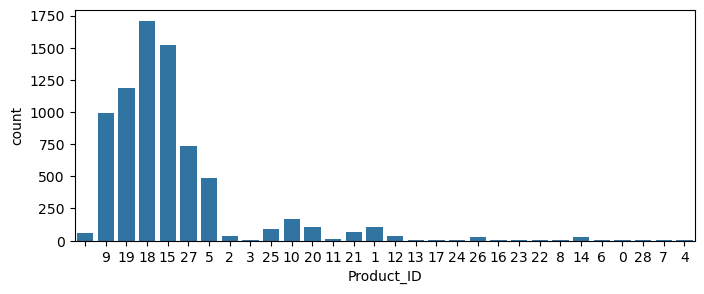

In [23]:
plt.figure(figsize=(8,3))
sns.countplot(df,x='Product_ID')
plt.show()

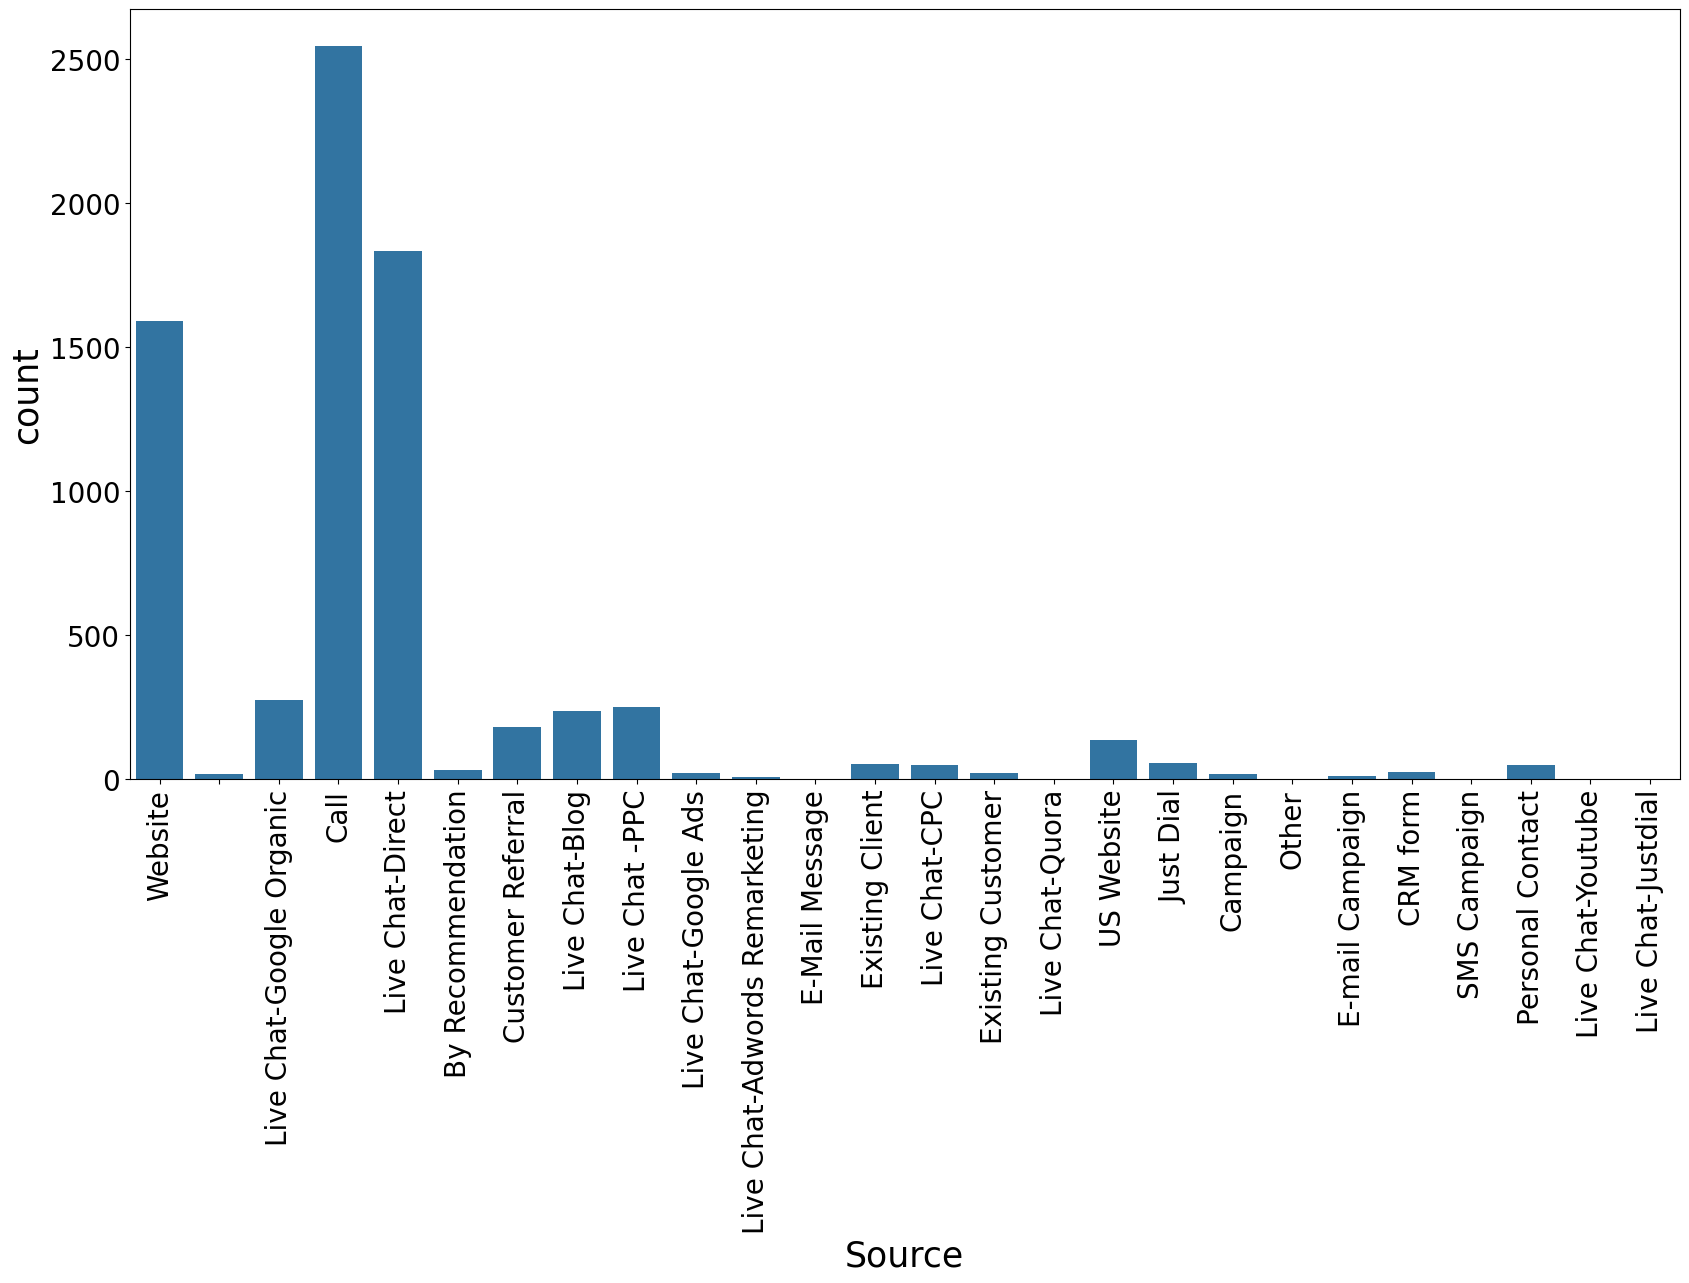

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(df,x='Source')
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Source',fontsize=25)
plt.ylabel('count',fontsize=25)
plt.show()

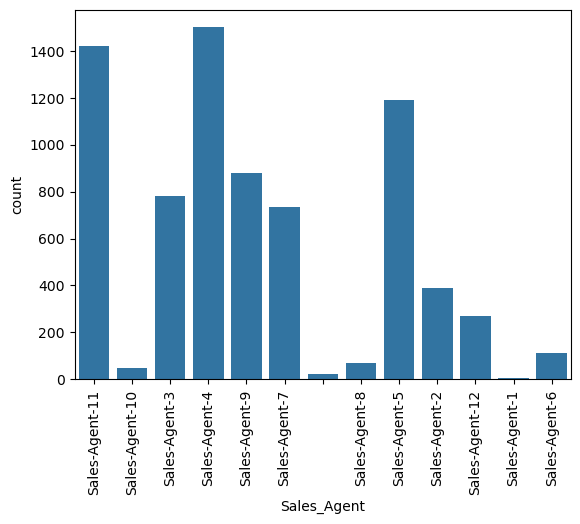

In [25]:
sns.countplot(df,x='Sales_Agent')
plt.xticks(rotation=90)
plt.show()

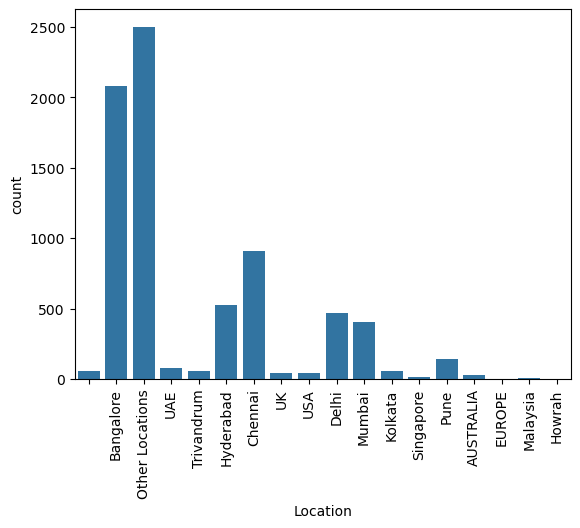

In [26]:
sns.countplot(df,x='Location')
plt.xticks(rotation=90)
plt.show()

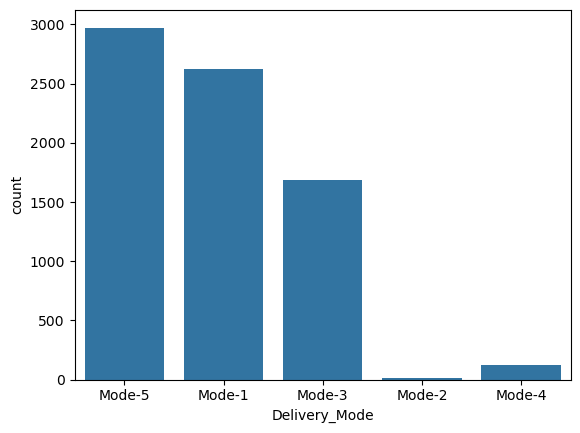

In [27]:
sns.countplot(df,x='Delivery_Mode')
plt.show()

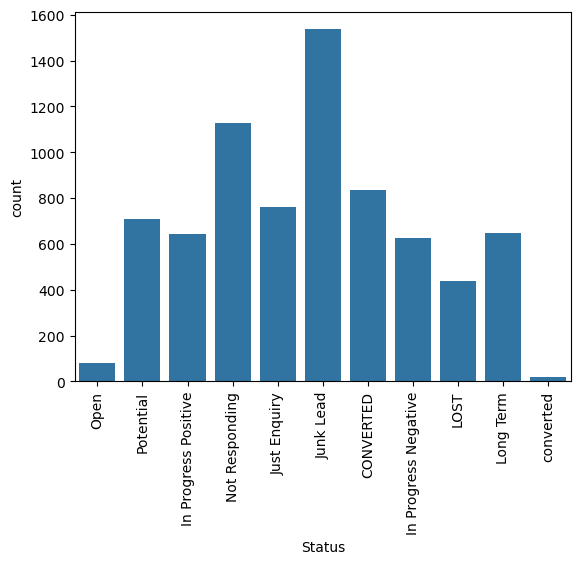

In [28]:
sns.countplot(df,x='Status')
plt.xticks(rotation=90)
plt.show()

### Bivariate analysis

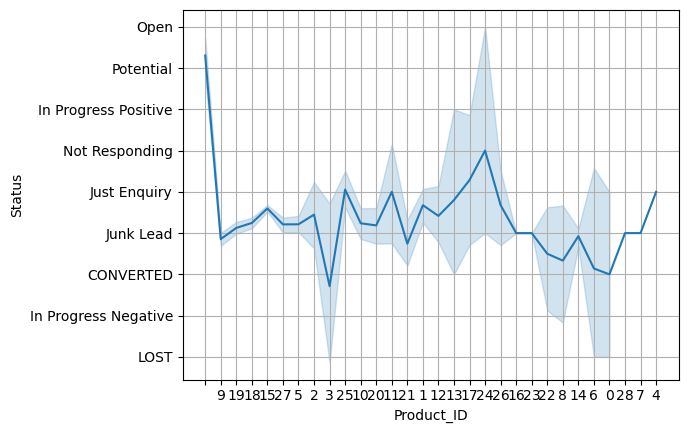

In [30]:
sns.lineplot(df,x='Product_ID',y='Status')
plt.grid(visible=True)

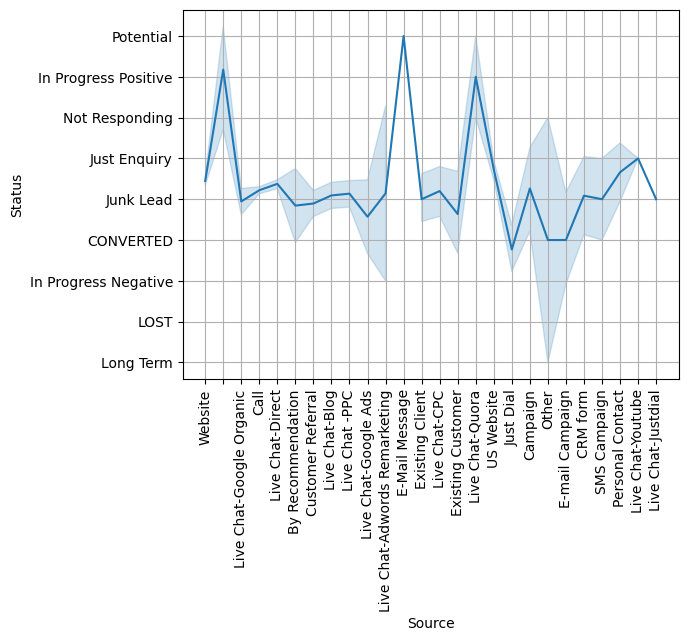

In [31]:
sns.lineplot(df,x='Source',y='Status')
plt.xticks(rotation=90)
plt.grid(visible=True)

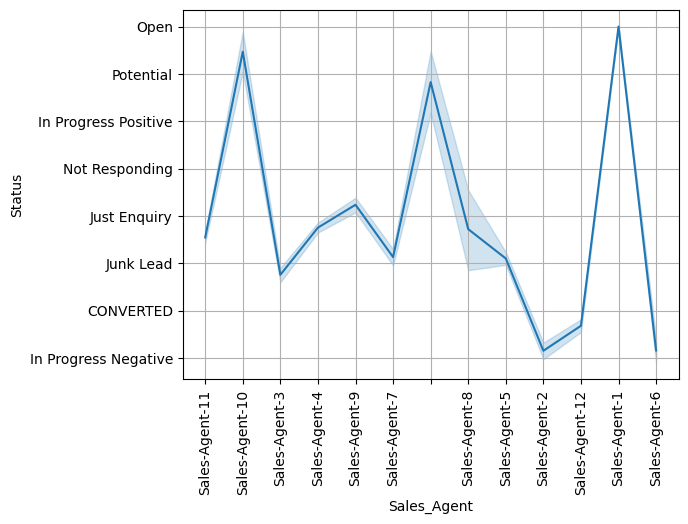

In [32]:
sns.lineplot(df,x='Sales_Agent',y='Status')
plt.xticks(rotation=90)
plt.grid(visible=True)

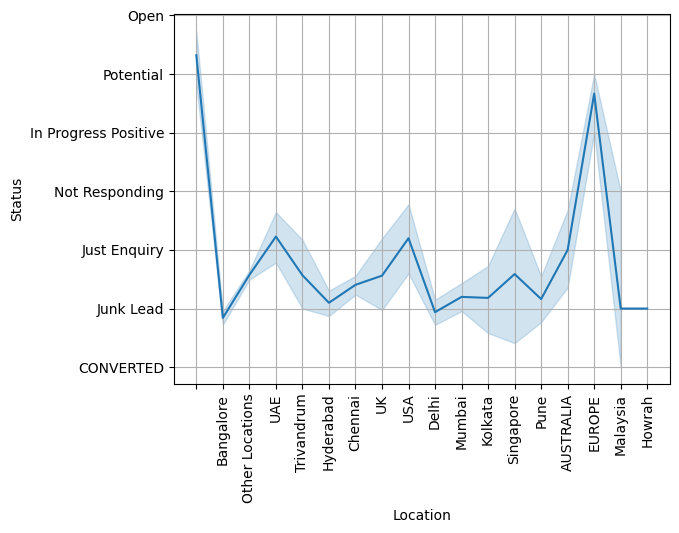

In [33]:
sns.lineplot(df,x='Location',y='Status')
plt.xticks(rotation=90)
plt.grid(visible=True)

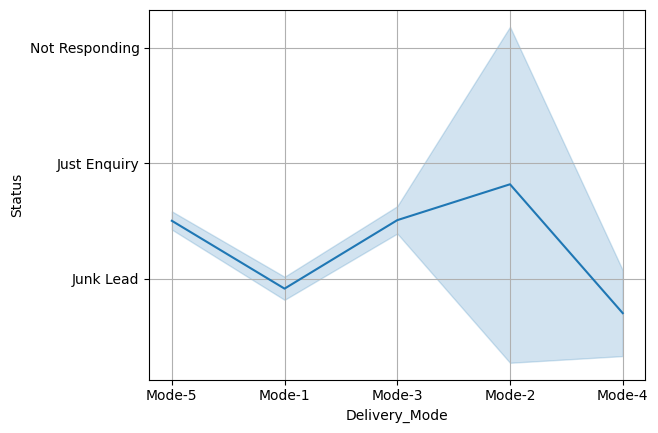

In [34]:
sns.lineplot(df,x='Delivery_Mode',y='Status')
plt.grid(visible=True)

## Data preprocessing

In [36]:
df.drop(df[df['Product_ID']==''].index,inplace=True)
df.drop(df[df['Source']==''].index,inplace=True)
df.drop(df[df['Sales_Agent']==''].index,inplace=True)
df.drop(df[df['Location']==''].index,inplace=True)
df.drop(df[df['Delivery_Mode']==''].index,inplace=True)
df.drop(df[df['Status']==''].index,inplace=True)

In [37]:
df.Product_ID.value_counts()

Product_ID
18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
8        6
17       6
13       4
16       3
24       2
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [38]:
df.Source.value_counts()

Source
Call                             2536
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
Existing Customer                  22
CRM form                           22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [39]:
df.Delivery_Mode.value_counts()

Delivery_Mode
Mode-5    2903
Mode-1    2614
Mode-3    1681
Mode-4     120
Mode-2      10
Name: count, dtype: int64

In [40]:
df.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1495
Sales-Agent-11    1414
Sales-Agent-5     1182
Sales-Agent-9      878
Sales-Agent-3      780
Sales-Agent-7      734
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10       5
Name: count, dtype: int64

In [41]:
df.Status.value_counts()

Status
Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder               
enc=LabelEncoder()
df.Source=enc.fit_transform(df.Source)
df.Sales_Agent=enc.fit_transform(df.Sales_Agent)
df.Location=enc.fit_transform(df.Location)
df.Delivery_Mode=enc.fit_transform(df.Delivery_Mode)

In [43]:
df.Status[df['Status']=='Junk Lead']=0
df.Status[df['Status']=='Not Responding']=0
df.Status[df['Status']=='CONVERTED']=1
df.Status[df['Status']=='Just Enquiry']=1
df.Status[df['Status']=='Potential']=1
df.Status[df['Status']=='Long Term']=1
df.Status[df['Status']=='In Progress Positive']=1
df.Status[df['Status']=='In Progress Negative']=0
df.Status[df['Status']=='LOST']=0
df.Status[df['Status']=='Open']=1
df.Status[df['Status']=='converted']=1

In [44]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9,16,971XXXXXXX,mXXXXXXX@gmail.com,4,1,0,1
19,13-11-2018 18:48,19,2,701XXXXXXX,#VALUE!,5,10,4,1
24,13-11-2018 17:09,18,24,790XXXXXXX,gXXXXXXX@gmail.com,1,13,0,1
25,13-11-2018 16:49,15,24,970XXXXXXX,aXXXXXXX@gmail.com,8,6,0,0
26,13-11-2018 16:37,18,2,740XXXXXXX,nXXXXXXX@gmail.com,8,1,0,1
...,...,...,...,...,...,...,...,...,...
7415,28-04-2018 09:45,9,2,,aXXXXXXX@gmail.com,7,9,3,0
7416,28-04-2018 09:43,15,2,,#VALUE!,2,10,4,0
7417,28-04-2018 09:20,5,14,,sXXXXXXX@gmail.com,1,1,0,0
7418,28-04-2018 08:04,21,1,,YXXXXXXX@gmail.com,5,10,0,1


In [45]:
df.drop(['Mobile'],axis=1,inplace = True)
df.drop(['EMAIL'],axis=1,inplace = True)
df.drop(['Created'],axis=1,inplace = True)

In [46]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,16,4,1,0,1
19,19,2,5,10,4,1
24,18,24,1,13,0,1
25,15,24,8,6,0,0
26,18,2,8,1,0,1
...,...,...,...,...,...,...
7415,9,2,7,9,3,0
7416,15,2,2,10,4,0
7417,5,14,1,1,0,0
7418,21,1,5,10,0,1


In [47]:
df.Status=df['Status'].astype('int64')
df.Product_ID=df['Product_ID'].astype('int64')


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7328 entries, 18 to 7419
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int64
 1   Source         7328 non-null   int32
 2   Sales_Agent    7328 non-null   int32
 3   Location       7328 non-null   int32
 4   Delivery_Mode  7328 non-null   int32
 5   Status         7328 non-null   int64
dtypes: int32(4), int64(2)
memory usage: 286.2 KB


In [49]:
print(df['Status'].value_counts())

Status
0    3715
1    3613
Name: count, dtype: int64


## Splitting Data

In [72]:
y = df.Status
x = df.iloc[:,[0,1,2,3,4]]

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=19)

In [80]:
x_train.shape

(5862, 5)

In [82]:
x_test.shape

(1466, 5)

In [84]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=7)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

## Logistic Regression


In [90]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [92]:
y_pred = log.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6323328785811733
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       743
           1       0.63      0.62      0.62       723

    accuracy                           0.63      1466
   macro avg       0.63      0.63      0.63      1466
weighted avg       0.63      0.63      0.63      1466



### Hyperparameter tuning for logistic regression


In [97]:
from sklearn.model_selection import GridSearchCV

In [99]:
model_ht=LogisticRegression()
params={'penalty' : ['l1', 'l2', 'elasticnet'],
        'fit_intercept':[True,False],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'random_state': list(range(0,43))
       }

logistic_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='f1',
                        n_jobs=-1,
                        verbose=3)

logistic_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 1548 candidates, totalling 7740 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1', verbose=3)

In [100]:
LogisticRegression_model=LogisticRegression(penalty='l2',fit_intercept=True,random_state=15,solver='sag')
LogisticRegression_model.fit(x_train_smote,y_train_smote)

y_pred=LogisticRegression_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       743
           1       0.63      0.62      0.62       723

    accuracy                           0.63      1466
   macro avg       0.63      0.63      0.63      1466
weighted avg       0.63      0.63      0.63      1466



## XGBoost Classifier

In [103]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [104]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [105]:
y_pred = xgb.predict(x_test)

In [106]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.67462482946794
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       743
           1       0.66      0.69      0.68       723

    accuracy                           0.67      1466
   macro avg       0.67      0.67      0.67      1466
weighted avg       0.68      0.67      0.67      1466



### Hyperparameter tuning for XGBoost Classifier

In [111]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


In [113]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist,
                                   n_iter=20, scoring='accuracy', cv=3, verbose=1, random_state=42)
random_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D49744B620>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D497499580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D4971D62A0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D4971AD730>},
                   random_state=42, scoring='accuracy', verbose=1)

In [114]:
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist,n_iter=20, scoring='accuracy', cv=3, verbose=1, random_state=42)
random_search.fit(x_train_smote, y_train_smote)

y_pred = random_search.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       743
           1       0.67      0.72      0.70       723

    accuracy                           0.69      1466
   macro avg       0.69      0.69      0.69      1466
weighted avg       0.69      0.69      0.69      1466



## Decision Tree

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [120]:
y_pred = DTC.predict(x_test)

In [122]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6527967257844475
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       743
           1       0.66      0.61      0.63       723

    accuracy                           0.65      1466
   macro avg       0.65      0.65      0.65      1466
weighted avg       0.65      0.65      0.65      1466



### Hyperparameter tuning for Decision Tree

In [125]:
model_ht=DecisionTreeClassifier()

params={'criterion' : ["gini",'entropy'],
        'splitter' : [ "random",'best'],
        'max_depth': list(range(0,20)),
        'min_samples_split':list(range(0,20)),
        'min_samples_leaf':list(range(0,20)),
        'random_state': list(range(0,43))
       }

tree_cv=RandomizedSearchCV(estimator=model_ht,
                        param_distributions=params,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5,
                        n_iter=10,
                        verbose=3)

tree_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...],
                                        'splitter': ['random', 'best']},
                   scoring='f1', verbose=3)

In [126]:
DecisionTreeClassifier_model=DecisionTreeClassifier(criterion='entropy',max_depth=13,min_samples_leaf=5,min_samples_split=11,splitter='best',random_state=10)
DecisionTreeClassifier_model.fit(x_train_smote,y_train_smote)

y_pred=DecisionTreeClassifier_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66       743
           1       0.64      0.61      0.63       723

    accuracy                           0.64      1466
   macro avg       0.64      0.64      0.64      1466
weighted avg       0.64      0.64      0.64      1466



## Artificial Neural Network


In [130]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(x_train_smote,y_train_smote)

MLPClassifier()

In [131]:
y_pred = mlpc.predict(x_test)

In [132]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6480218281036835
              precision    recall  f1-score   support

           0       0.74      0.47      0.57       743
           1       0.60      0.83      0.70       723

    accuracy                           0.65      1466
   macro avg       0.67      0.65      0.64      1466
weighted avg       0.67      0.65      0.64      1466



### Hyperparameter tuning for Artificial Neural Network

In [137]:
model_ht=MLPClassifier()

params={'hidden_layer_sizes':[(100,),(200,),(300,),(400,),(500,),(1000,),(100,2),(200,2),(300,2),(400,2),(500,2),(1000,2)],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'learning_rate_init':[0.001,0.01,0.1,1],
        'random_state': list(range(0,43))
       }

ann_cv=RandomizedSearchCV(estimator=model_ht,
                        param_distributions=params,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5,
                        n_iter=50,
                        verbose=3)

ann_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'hidden_layer_sizes': [(100,), (200,),
                                                               (300,), (400,),
                                                               (500,), (1000,),
                                                               (100, 2),
                                                               (200, 2),
                                                               (300, 2),
                                                               (400, 2),
                                                               (500, 2),
                                                               (1000, 2)],
                                        'learning_rate_init': [0.001, 0.01, 0.1,
                                                               1],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   scoring='f1', verbose=3)

In [138]:
MLPClassifier_model=MLPClassifier(hidden_layer_sizes=(300,),learning_rate_init=0.001,solver='adam',random_state=33)
MLPClassifier_model.fit(x_train_smote,y_train_smote)

y_pred=MLPClassifier_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       743
           1       0.66      0.62      0.64       723

    accuracy                           0.65      1466
   macro avg       0.66      0.65      0.65      1466
weighted avg       0.66      0.65      0.65      1466



## Support Vector Machine

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_smote,y_train_smote)

SVC()

In [155]:
y_pred = svc.predict(x_test)

In [156]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6350613915416098
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       743
           1       0.62      0.68      0.65       723

    accuracy                           0.64      1466
   macro avg       0.64      0.64      0.63      1466
weighted avg       0.64      0.64      0.63      1466



### Hyperparameter tuning for SVC

In [160]:
model_ht =SVC()

params = { 'kernel' : ['linear','rbf','sigmoid'],
          'gamma' : ['scale','auto'],
          'random_state': list(range(0,43))
         }

svm_cv = GridSearchCV(estimator = model_ht,
                      param_grid= params,
                      scoring = 'f1',
                      n_jobs = -1,
                      verbose = 3)
svm_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 258 candidates, totalling 1290 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='f1', verbose=3)

In [162]:
SVC_model=SVC(gamma='auto',kernel='rbf',random_state=0)
SVC_model.fit(x_train_smote,y_train_smote)

y_pred=SVC_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       743
           1       0.64      0.69      0.66       723

    accuracy                           0.65      1466
   macro avg       0.65      0.65      0.65      1466
weighted avg       0.65      0.65      0.65      1466



In [164]:
import pickle

models = {
    "logistic_regression": LogisticRegression_model,
    "xgboost": xgb_clf,
    "decision_tree": DecisionTreeClassifier_model,
    "mlp_classifier": MLPClassifier_model,
    "svm": SVC_model
}

with open('trained_models.pkl', 'wb') as f:
    pickle.dump(models, f)


### REPORT

1)Importing all the essential packages.

2)Feature Enginnering process is used to know about hidden features of the data.

3)Data Cleaning process is used to find out the duplicate values and drop the unwanted features.

4)Data preprocessing is used to Scaling the values to learn about the data easily by the machine.

5)Split the data into train and test.

6)Model Building process has been made which includes LogisticRegression,Support Vector Machine, Neural Network, Decision tree and XGBClassifier.

7)Hyperparameter tuning results in only little improvement in the performance.

8)Out of all the model XGBoost gives excellent accuracy of 0.69.

9)Deploy the model into pickle file.